In [1]:
from preamble import *

In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [3]:
import sys
print("python 버전: ", sys.version)

import pandas as pd
print("pandas 버전: ", pd.__version__)

import matplotlib
print("matplotlib 버전: ", matplotlib.__version__)

import numpy as np
print("NumPy 버전: ", np.__version__)

import scipy as sp
print("SciPy 버전: ", sp.__version__)

import IPython
print("IPython 버전: ", IPython.__version__)

import sklearn
print("scikit-learn 버전: ", sklearn.__version__)

python 버전:  3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
pandas 버전:  0.25.3
matplotlib 버전:  3.1.1
NumPy 버전:  1.16.4
SciPy 버전:  1.3.2
IPython 버전:  7.6.1
scikit-learn 버전:  0.22


In [4]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# 지도 학습
# 분류와 회귀
# 일반화, 과대적합, 과소적합
# 모델 복잡도와 데이터셋 사이즈의 관계
# 지도 학습 알고리즘

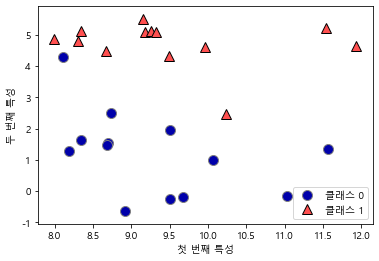

X.shape: (26, 2)


In [5]:
import matplotlib.pyplot as plt
import mglearn
# 데이터 셋을 만든다.
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 산점도를 그린다.
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
plt.show()
print("X.shape: {}".format(X.shape))

# k-최근접 이웃
# k-최근접 이웃 분류

# 이웃이 1개일때
## 이웃한 개체의 색깔로 변함.

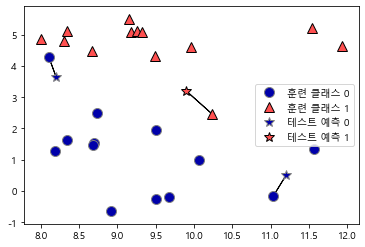

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

# 이웃이 3개일때
## 이웃 중에 많은 갯수 색깔로 변함.

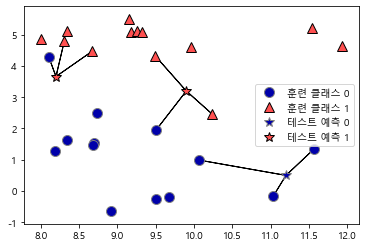

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# 3. 분류 모델의 성능을 측정해보자.

In [8]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

### 훈련세트를 사용 분류 모델 학습.

In [10]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### predict 메서드를 호출하여 예측하기

In [11]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


### 얼마나 잘 "일반화" 되었는지 score  메서드 호출

In [12]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


## KNeighborsClassifier 분석

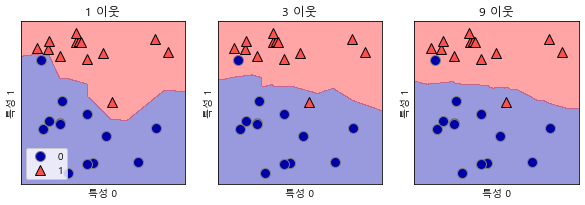

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # subplot 1줄에 3개짜리 생성

# 이웃의 갯수에 따른 최근접 이웃 모델의 경계 
# 이웃이 1개/ 3개/ 9개의 이웃일때 의 경계를 표시

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)


# 유방암 데이터

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)

print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
print(X_train)

[[ 13.87   20.7    89.77  ...   0.068   0.225   0.085]
 [ 17.57   15.05  115.    ...   0.146   0.276   0.079]
 [ 13.3    21.57   85.24  ...   0.056   0.264   0.067]
 ...
 [ 14.58   21.53   97.41  ...   0.27    0.426   0.128]
 [ 13.65   13.16   87.88  ...   0.081   0.238   0.087]
 [ 20.73   31.12  135.7   ...   0.166   0.287   0.082]]


In [16]:
print(X_test)

[[12.91  16.33  82.53  ...  0.082  0.302  0.069]
 [11.41  14.92  73.53  ...  0.063  0.181  0.074]
 [14.99  25.2   95.54  ...  0.029  0.157  0.055]
 ...
 [11.34  21.26  72.48  ...  0.083  0.283  0.088]
 [14.22  27.85  92.55  ...  0.082  0.189  0.078]
 [13.21  28.06  84.88  ...  0.08   0.247  0.064]]


In [17]:
print(y_test)

[1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


In [18]:
print(y_test)

[1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1]


### DESCR : 데이터에 대한 설명이 나와있음.
### 교육용 정제도니 데이터라 이런게 있는거고
### 현실적인 데이터에는 이런 기능은 없음

In [19]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
cancer_data = cancer.data

cancer_df = pd.DataFrame(data = cancer_data,
                        columns = cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,...,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.0,...,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.0,...,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.1,...,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.0,...,0.16,0.24,0.08,0
5,12.45,15.70,82.57,477.1,...,0.17,0.40,0.12,0
6,18.25,19.98,119.60,1040.0,...,0.19,0.31,0.08,0
7,13.71,20.83,90.20,577.9,...,0.16,0.32,0.12,0
8,13.00,21.82,87.50,519.8,...,0.21,0.44,0.11,0
9,12.46,24.04,83.97,475.9,...,0.22,0.44,0.21,0


In [132]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [22]:
print("클래스별 샘플 갯수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [23]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [24]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

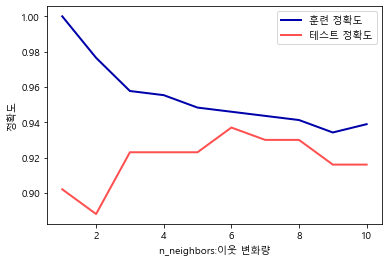

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, # 원본데이터
                                                    cancer.target, # 타겟 데이터
                                                    stratify=cancer.target, # 원본 그대로를 쓰겠다.
                                                    random_state=66) # 이 설정을 쓰지않고 디폴트로 쓸시에 값이 계속 바뀌게되므로
                                                                        # 66으로 값을 고정 후 돌리겠다는 의미

training_accuracy = []
test_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings: # 1 에서 10 까지 n_neighbors 를 적용
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # 1 에서 10 까지 n_neighbors 를 적용
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors:이웃 변화량")
plt.legend()

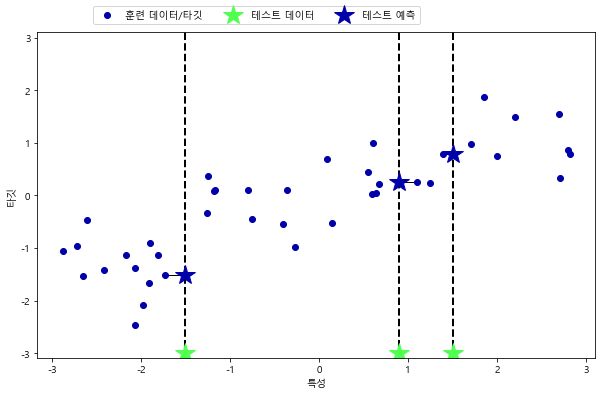

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

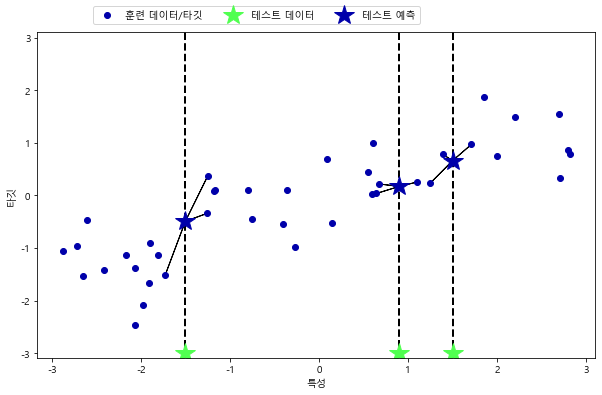

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# 회귀(Regression)
## 이전까지는 분류(classifying)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


# R²값의 범위 :  0 ≤ R² ≤ 1

In [30]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


## KNeighborsRegressor 분석

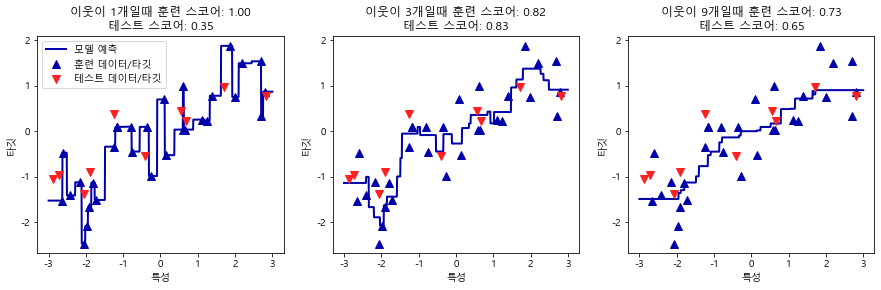

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)                                    
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title("이웃이 {}개일때 훈련 스코어: {:.2f}\n테스트 스코어: {:.2f}".format(n_neighbors, 
                                                                                     reg.score(X_train, y_train), 
                                                                                     reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃","테스트 데이터/타깃"], 
               loc="best")

### 장단점과 파라메타
# 선형 모델
### 1. 선형 회귀 모델

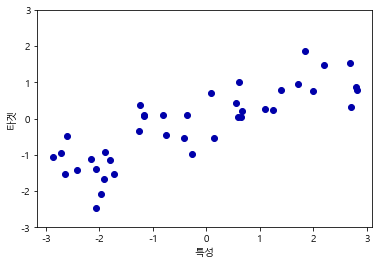

In [32]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

# 데이터셋 가져오기
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")
plt.show()

### 만약 특성이 1개인 데이터 셋이면 y=w[0]*x[0]+b로 나타내어진다.
### 특성이 많아지면  w는 각 특성에 해당하는 기울기를 가진다.

w[0]: 0.393906  b: -0.031804


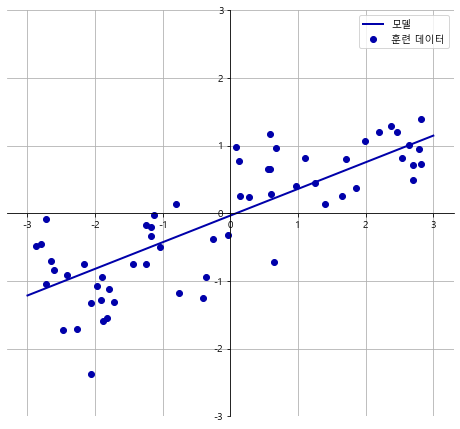

In [33]:
mglearn.plots.plot_linear_regression_wave()

## Linear Regression(선형회귀) 모델 - 보스턴 주택가격( 복잡한 데이터셋)

#### load_exted_boston() 자료로 boston() 자료와는 다른 extended 된 자료임.

In [34]:
from sklearn.datasets import load_boston
import mglearn
boston = load_boston()
X,y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

# X.shape : (506, 104)
# 506개의 샘플과 104개의 특성

X.shape : (506, 104)


In [35]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [36]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 선형 회귀 모델로 성능 확인

### 2. 선형회귀(최소제곱법)

In [37]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

### 기울기 파라미터("w")는 가중치/계수라고 하며 "coef_" 속성에 저장되어 있다.
### 파라미터 "b"는 편향/절편 값은 "intercept_"속성에 저장되어있다.

In [38]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [39]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [40]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [41]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 훈련 세트의 정확도 : 0.95
### 테스트 세트의 정확도 : 0.61
### 훈련 데이터와 테스트 데이터 사이에 성능 차이가 크다. >>> 과대적합(OVERFITTING)

### 3. 릿지 회귀

### 훈련정확도는 떨어졌지만(0.95 -> 0.89↓) 테스트 정확도(0.61 -> 0.75↑)는 올라갔다.

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0)
ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


#### alpha=1

In [43]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge1.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge1.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


#### alpha=10

In [44]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


#### alpha=0.1

In [45]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


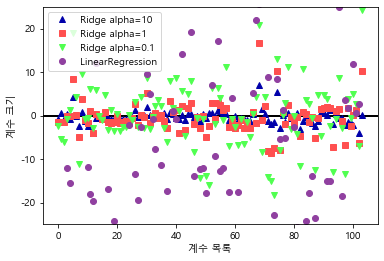

In [46]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

## 6. 데이터 세셋의 크기에 따른 모델의 성능 변화 확인하기
### 학습 곡선: 데이터셋의 샘플링에 따른 모델의 성능변화 그래프

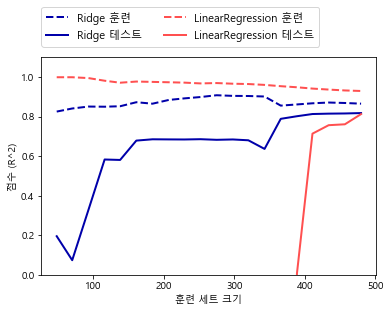

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)
mglearn.plots.plot_ridge_n_samples()

### 위 그림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다.
#### 1.릿지 회귀에는 규제(L2)가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.
#### 2.그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.
#### 3.두 모델의 성능은 데이터가 많아질수록 좁아지고 마지막에는 선형 회귀가 릿지 회귄를 따라잡는다.
#### => 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.


# Lasso

### 1. 확장된 보스턴 주택가격 데이터셋 적재/확인하기

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트 점수: 0.27
테스트 세트 점수: 0.26
사용한 특성의 개수: 3
사용한 max_iter : 13


#### Lasso 는 훈련 세트와 ㄷ테스트 세트 모두에서 결과가 좋지않다.
#### 이는 과소적합이며, 104개의 특성 중 4개만 사용한 것을 볼 수 있다.

## 3. alpha 값에 따른 라쏘 회귀 성능 측정

In [49]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))
print("사용한 max_iter : {}".format(lasso001.n_iter_))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.80
사용한 특성의 개수: 34
사용한 max_iter : 1090


In [50]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))
print("사용한 max_iter : {}".format(lasso00001.n_iter_))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.81
사용한 특성의 개수: 95
사용한 max_iter : 58870


#### alpha 값을 작게 할 수록 사용한 특성 개수를보면 4 -> 33 -> 94개로 증가한것을 보면 된다.
#### alpha 값을 낮추면 규제의 효과가 없어져 과대적합(overfitting)이 되므로 LinearRegression의 결과와 비슷해진다.

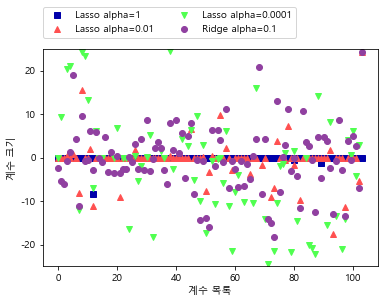

In [51]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()

#### 실제로 이 두 모델 중 보통은 릿지 회귀를 선호한다.
#### 하지만 특성이 많고 그 중 일부분만 중요하다면 lasso가 더 좋은 선택일 수 있따.

#### scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다.
#### 실제로 이 조합은 최상의 성능을 내지만 L1규제와 L2 규제를 위한 매개변수 두개를 조정해야한다.

# 선형 분류 알고리즘
#### linear_model.LogisticRegression에 구현된 로지스틱 회귀

In [52]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

### forge 데이터로 클래스 분류

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


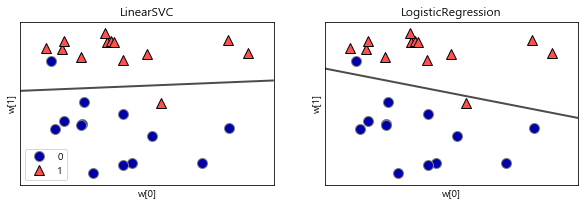

In [53]:
X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,
                                    X,
                                    fill=False,
                                    eps=0.5,
                                    ax=ax,
                                    alpha=0.7)
    mglearn.discrete_scatter(X[:,0],
                             X[:,1],
                             y,
                             ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("w[0]")
    ax.set_ylabel("w[1]")
axes[0].legend()    

#### 첫번째 특성을 x축에 놓고 두번째 특성을 y축에 놓았다.
#### 위쪽은 클래스1, 아래쪽은 클래스0으로 나누고 있따.
#### 이 두 모델은 회귀에서 본 Ridge와 같이 L2규제를 사용한다.
#### LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.
#### C의 값이 놓아지면 규제가 감소하고 계수벡터(w)가 0에 가까워지며, C의 값을 높게하면 훈련세트에 가능한 맞춘다.

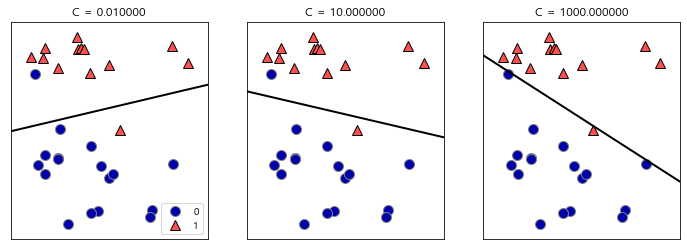

In [54]:
mglearn.plots.plot_linear_svc_regularization()

#### 첫번째 그림은 아주 작은 C값으로 규제가 많이 적용되었다.
#### 규제가 많이 적용된 모델은 비교적 수평에 가까운 결정 경계를 만들었고, 잘못 분류된 데이터는 2개이다.
#### 두번째 그림은 C값이 조금 더 크며, 잘못 분류한 두 데어터에 민감해져 결정 경계가 기울어졌다.
#### 세번째 그림은 C값을 아주 크게하여, 결정 경계는 크게 기울고, 1개만 잘못 분류되었다.
#### 전체를 정확하게분류하려했지만, 전체적인 배치를 잘 파악하지 못한 결과이다. --> 과대적합(overfitting)
#### 회귀와 비슷하게 분류에서의 선형모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적으로 보인다.
#### 하지만 고차원에서는 분류에 대한 선형모델이 강해지며, 특성이 많아지면 과대적합되지 않도록 해야한다.

In [55]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=66)

logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.960
테스트 세트 점수: 0.937


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.937


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.939
테스트 세트 점수: 0.923


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

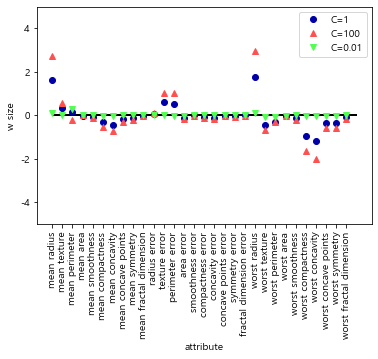

In [58]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)

# 유방암 데이터셋에 각기 다른 C값을 사용하여 만든 로지스틱 회의 계수값의 그래프
plt.plot(logreg.coef_.T,
         'o',
         label="C=1")
plt.plot(logreg100.coef_.T,
         '^',
         label="C=100")
plt.plot(logreg001.coef_.T,
         'v',
         label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),
          cancer.feature_names,
          rotation=90)
plt.hlines(0,
           0,
          cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("attribute")
plt.ylabel("w size")
plt.legend()

C=0.001 인 L1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001 인 L1 로지스틱 회귀의 테스트 정확도: 0.90
C=1.000 인 L1 로지스틱 회귀의 훈련 정확도: 0.97
C=1.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.94
C=100.000 인 L1 로지스틱 회귀의 훈련 정확도: 1.00
C=100.000 인 L1 로지스틱 회귀의 테스트 정확도: 0.97


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


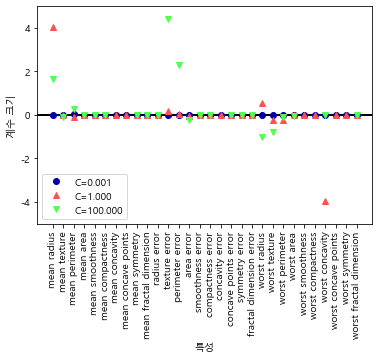

In [59]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', 
                               C=C, 
                               penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 L1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 L1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 
             marker, 
             label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), 
           cancer.feature_names, 
           rotation=90)
xlims = plt.xlim()
plt.hlines(0, 
           xlims[0], 
           xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 이와 같이 이진분류-선형모델 과 회귀-선형모델 간에는 유사점이 많다.
### 중요한 점은 규제에서 모든 특성을 사용할지(L2-규제)
### 일부 특성만 사용할지(L1-규제)인지 결정하는 penalty 매개변수가 차이이다.

# <<다중 클래스 분류를 위한 선형 모델>>

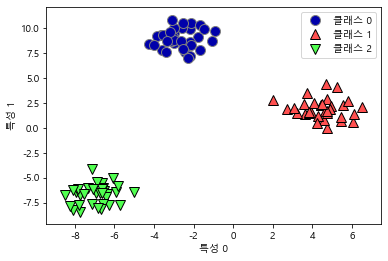

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

# 2차원 데이터 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

## 2. LinearSVC 분류기로 훈련

In [61]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


## 3. 세개의 이진 분류기가 만드는 경계를 그려보기

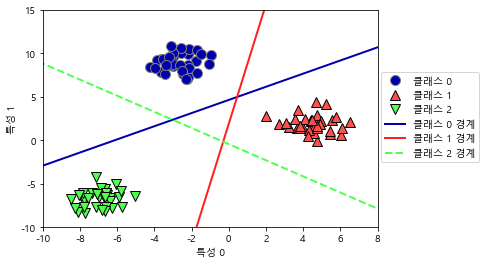

In [62]:
# 3개의 1:N 분류기가 만든 결정 경계
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                   linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, 
             -(line * coef[0] + intercept) / coef[1], 
             c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', 
            '클래스 1', 
            '클래스 2', 
            '클래스 0 경계', 
            '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

## 4. 세 대의 일대다 분류기의 다중 클래스 결정 경계

Text(0, 0.5, '특성 1')

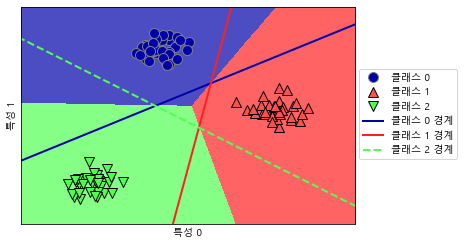

In [63]:
mglearn.plots.plot_2d_classification(linear_svm, 
                                     X, 
                                     fill=True, 
                                     alpha=.7) # 결정경계

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, 
                                   linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, 
             -(line * coef[0] + intercept) / coef[1], 
             c=color)
plt.legend(['클래스 0', 
            '클래스 1', 
            '클래스 2', 
            '클래스 0 경계', 
            '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 나이브 베이즈 분류기

In [64]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [65]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### X[ y == label ]에서 
#### y == label이란건 
#### y 배열 값 중에 label과 같은 값을 가진 요소를 찾고
#### 그 요소의 인덱스 번호를 반환한다는 의미이다.
#### label == 0 이라면 y 배열에서 인덱스는 0 과 2 가 반환되고
#### label == 1 이라면 y 배열에서 인덱스는 1 과 3 이 반환된다.

#### X[ y == label ].sum(axis=0)에선
#### axis=0 즉, 행방향으로 더하라는 의미이다.

# -----------------------------------------------------------------------------------------------------------
# 의사결정 트리 시각화
#### ** 의사결정트리의 장점
### 다른 모델들에 비해, 큰 수학적인 지식이 없어도, 트리 그림을 보면, 어떻게 예측값이 도출되었는지 쉽게 알 수 있다.
### **tree의 node는 질문이나 정답을 담은 네모 상자를 말하며
### root node는 최상위 node이고 leaf node는 마지막 node 입니다.

### decision tree를 학습한다는 것은
#### 정답에 가장 빨리 도달하는 True/ False 질문 목록을 학습하는 것입니다.
#### 머신러닝에서 이런 질문들을 'test'라ㅓ 합니다.
#### 만약 tree를 만들때 모든 leaf node가 pure node가 

### OVERFITTING을 막는 전략 2가지.
#### 1. TREE 생성을  사전에 중단합니다. : 사전가짖치기 (PRE-PRUNING)
#### 2. 데이터 포인트가 적은 NODE를 삭제하거나 병합합니다. : 사후 가지치기(POST-PRUNING)

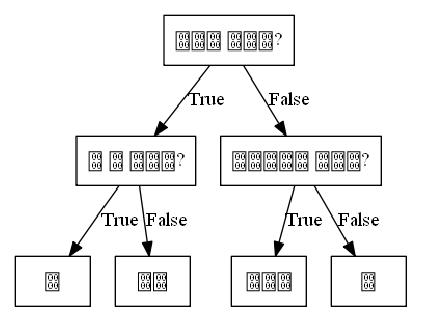

In [66]:
mglearn.plots.plot_animal_tree()

# 결정 트리 만들기

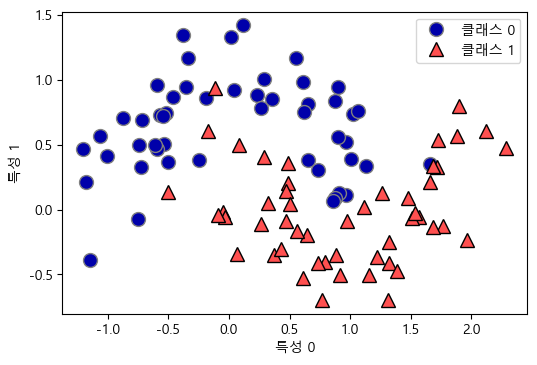

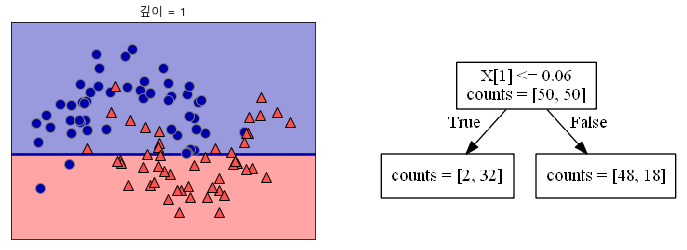

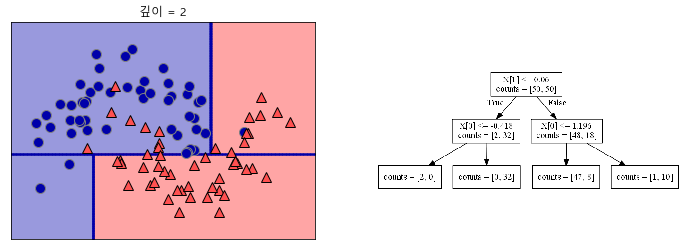

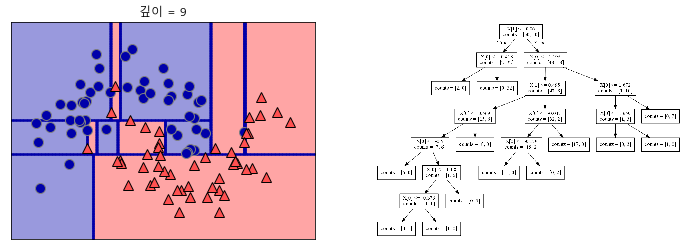

In [67]:
mglearn.plots.plot_tree_progressive()

# 결정 트리의 복잡도 제어하기

In [68]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
# 훈련(75%)/테스트(25%) 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
# 의사결정 트리 선언
tree = DecisionTreeClassifier(random_state=0)

# 훈련 데이터로 학습 시키기
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다. 
### 즉, 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억한다. 
### 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해진다. 
### 그래서 가지치기하지 않은 트리는 과대적합(overfitting)되기 쉽다.

In [69]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 이는 훈련 세트의 정화도를 떨어뜨리지만 테스트 세트의 성능은 개선된다.
### 이렇게 depth를 조절하여 과대적합을 막을 수 있다.
### max_depth : 트리의 최대 한도 깊이
### random_state : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터.

# 결정 트리 분석

In [70]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["cancer", "not cancer"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

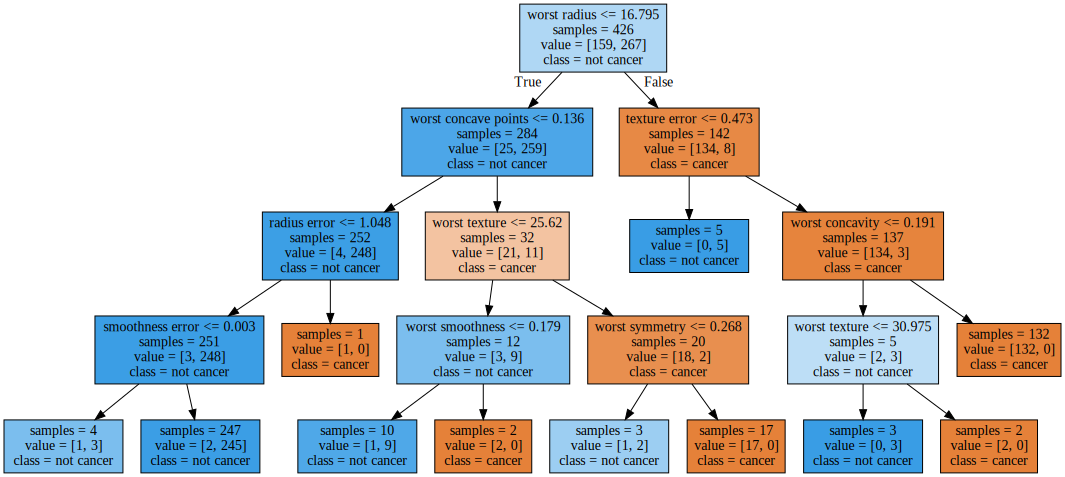

In [71]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [72]:
dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename="../../images/tree.png")

'../../images\\tree.png.pdf'

# 트리의 특성 중요도

In [73]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


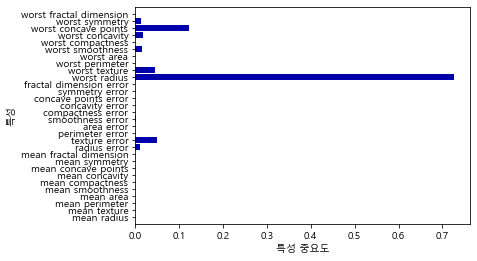

In [74]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


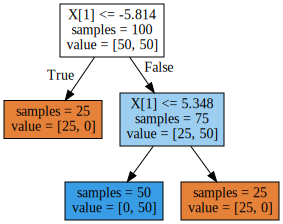

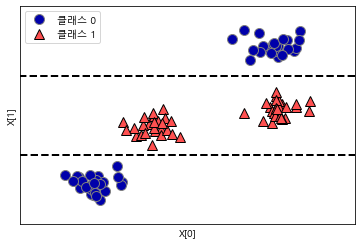

In [75]:
tree = mglearn.plots.plot_tree_not_monotone()
tree

Text(0, 0.5, '가격 ($/Mbyte)')

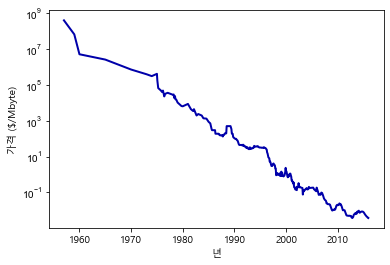

In [76]:
import os
ram_prices = pd.read_csv("../../data/ram_price.csv")

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [77]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

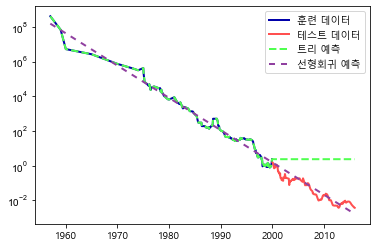

In [78]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

#### 장단점과 매개변수
### 결정 트리의 앙상블
#### 랜덤 포레스트
#### 랜덤 포레스트 구축
#### 랜덤 포레스트 분석

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

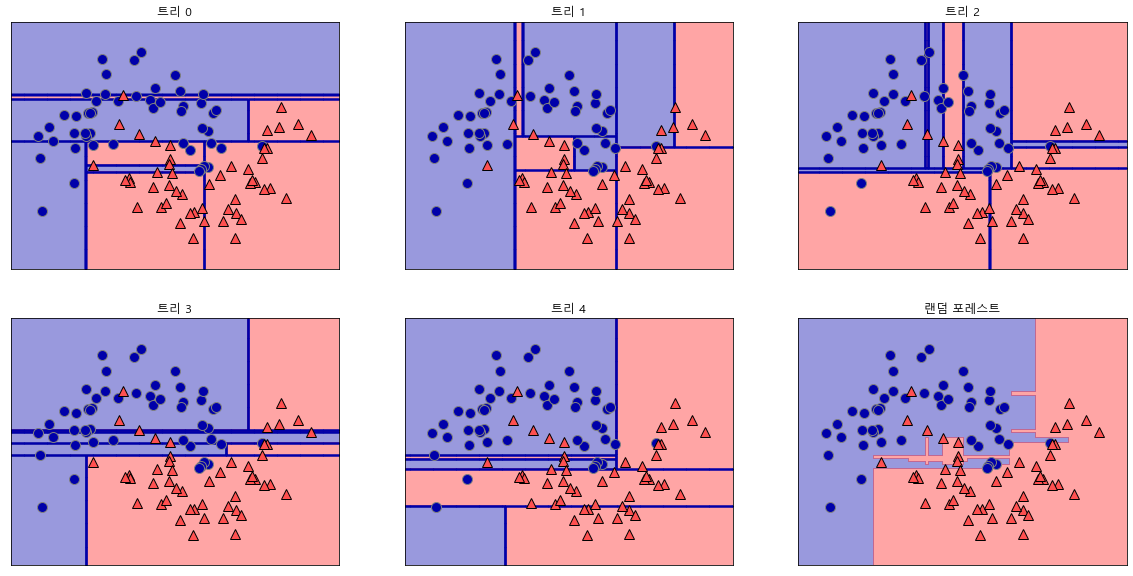

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


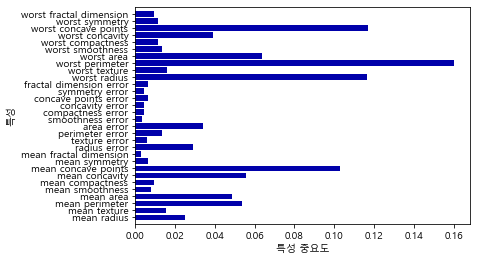

In [82]:
plot_feature_importances_cancer(forest)

#### 장단점과 매개변수
#### 그래디언트 부스팅 회귀 트리

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


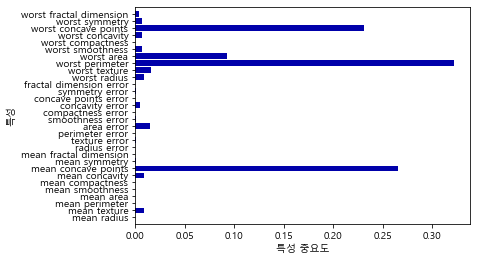

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### 장단점과 매개변수
### 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

Text(0, 0.5, '특성 1')

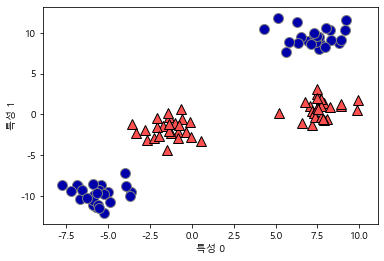

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

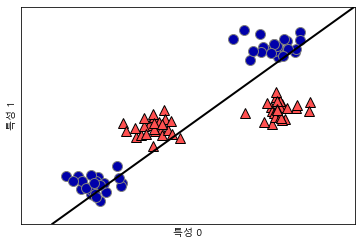

In [88]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

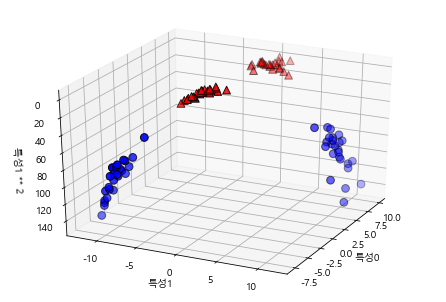

In [89]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show()

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

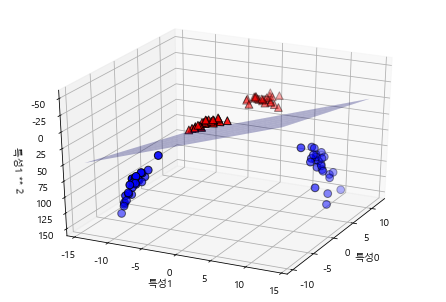

In [90]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

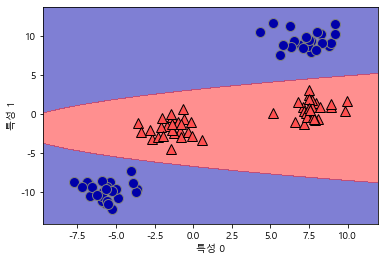

In [91]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 커널 기법
## SVM 이해하기

Text(0, 0.5, '특성 1')

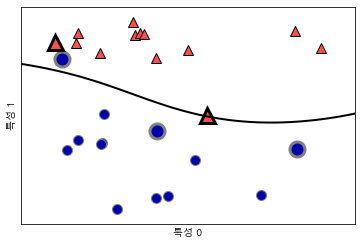

In [92]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# SVM 매개변수 튜닝

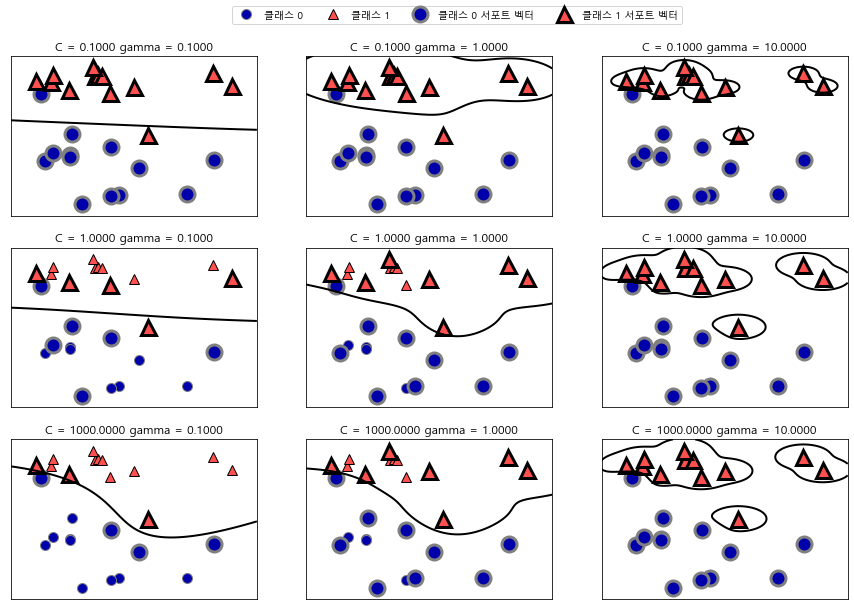

In [93]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

사이킷런 0.20 버전에서 SVC 클래스의 gamma 매개변수 옵션에 auto외에 scale이 추가되었습니다. auto는 1/n_features, 즉 특성 개수의 역수입니다. scale은 1/(n_features * X.std())로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 gamma 매개변수의 기본값이 auto에서 scale로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 scale과 auto는 차이가 없습니다.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

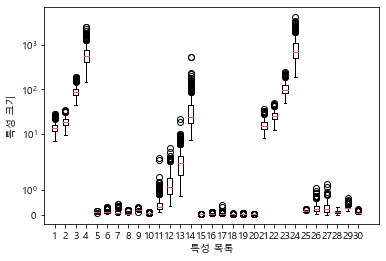

In [114]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlim([0,32])
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

## SVM 을 위한 데이터 전처리

In [115]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [116]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [117]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [118]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


### 장단점과 매개변수
## 신경망 (딥러닝)
### 신경망 모델

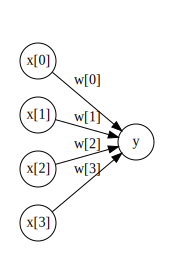

In [119]:
mglearn.plots.plot_logistic_regression_graph()

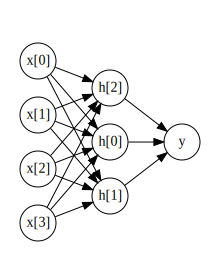

In [120]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

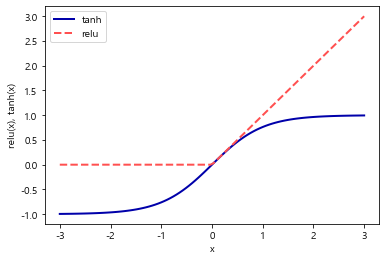

In [121]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

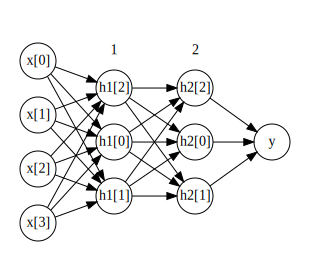

In [122]:
mglearn.plots.plot_two_hidden_layer_graph()

# 신경망 튜닝

Text(0, 0.5, '특성 1')

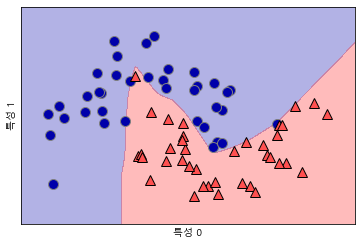

In [123]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, 
                  noise=0.25, 
                  random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, 
                                X_train, 
                                fill=True, 
                                alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], 
                         X_train[:, 1], 
                         y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

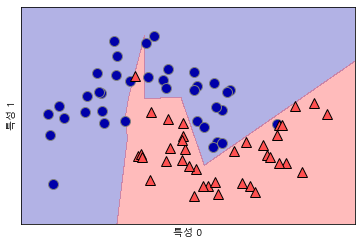

In [124]:
mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0, 
                    hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, 
                                X_train, 
                                fill=True, 
                                alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], 
                         X_train[:, 1], 
                         y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

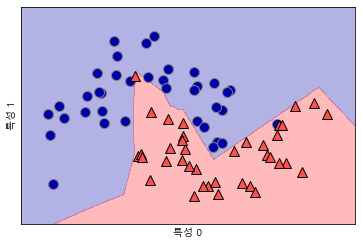

In [125]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', 
                    random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, 
                                X_train, 
                                fill=True, 
                                alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], 
                         X_train[:, 1], 
                         y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

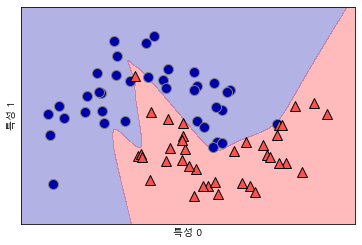

In [126]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', 
                    activation='tanh',
                    random_state=0, 
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, 
                                X_train, 
                                fill=True, 
                                alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], 
                         X_train[:, 1], 
                         y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


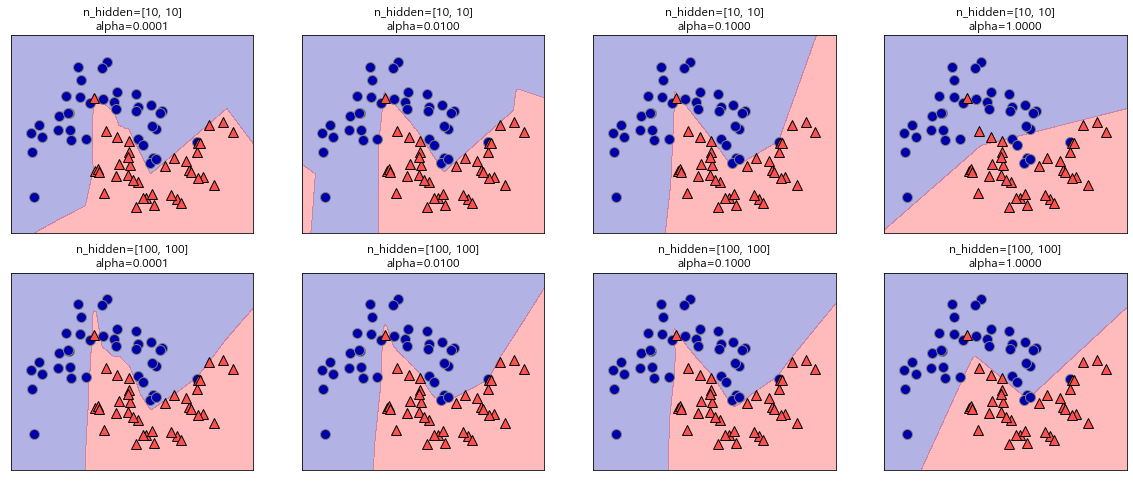

In [127]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

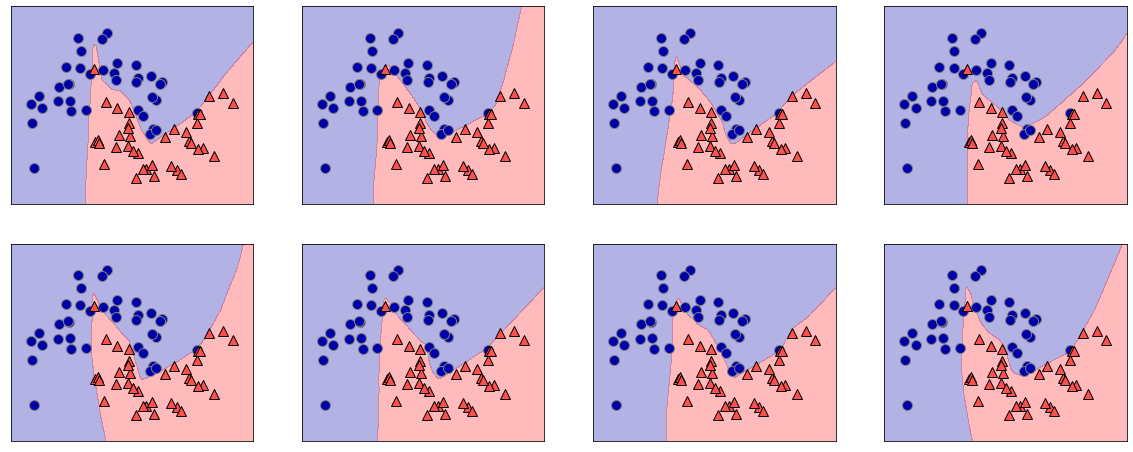

In [128]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', 
                        random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, 
                                    X_train, 
                                    fill=True, 
                                    alpha=.3, 
                                    ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], 
                             X_train[:, 1], 
                             y_train, 
                             ax=ax)

In [129]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [130]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [131]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\sundooedu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
